In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sample():
    omega = 2*np.pi*(7+2) # R = 7 here
    theta = []
    n = []
    delt = 1/128
    i = 0
    while(i*delt < 1):
      theta.append((omega*i*delt)%(2*np.pi))
      n.append(i)
      i+=1
    theta = np.array(theta)
    n = np.array(n)
    return theta, n

In [3]:
def theta_plot():
    theta,n = sample()
    plt.plot(n,theta,'o-')
    plt.xlabel("n")
    plt.ylabel("theta")
    plt.title("Theta vs n")
    plt.savefig("theta.png")
    plt.show()

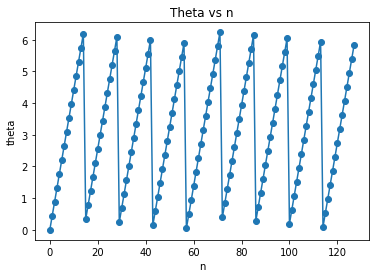

In [4]:
theta_plot()

In [5]:
def split():
    thetatest, ntest = sample()
    np.random.seed(7+2) # R = 7 here
    ntrain = np.sort(np.array(np.random.choice(127, 10, replace=False)))
    thetatrain = []
    for i in range(len(ntrain)):
        thetatrain.append(thetatest[ntrain[i]-i])
        ntest = np.delete(ntest,ntrain[i]-i)
        thetatest = np.delete(thetatest,ntrain[i]-i)
    thetatrain = np.array(thetatrain)
    return ntrain, thetatrain, ntest, thetatest

In [6]:
def plot_split():
    ntrain,thetatrain,ntest,thetatest = split()
    plt.plot(ntrain,thetatrain,'o-')
    plt.xlabel("n")
    plt.ylabel("theta")
    plt.title("Theta vs n for training set")
    plt.savefig("thetatrain.png")
    plt.show()

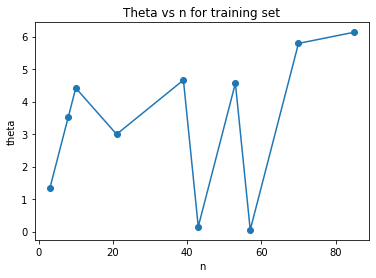

In [7]:
plot_split()

In [8]:
def ls():
    ntrain,thetatrain,ntest,thetatest = split()
    M = [5,11,20]
    w = []
    plt.figure(figsize=(20,10))
    for i in range(3):
        X = []
        for j in range(M[i]+1):
            X.append(np.power((ntrain)/128,j, dtype=float))
        X = np.array(X)
        X = X.transpose()
        w.append((np.linalg.inv((X.transpose())@X))@((X.transpose())@(thetatrain.transpose())))
        #######################
        #plotting training data
        plt.subplot(2,3,i+1)
        plt.plot(ntrain,thetatrain, 'o-', label="True")
        plt.plot(ntrain, X@(w[i].transpose()), 'o-', label="Estimated")
        plt.xlabel("n")
        plt.ylabel("f(n)")
        plt.title("N = 10; D = "+str(M[i])+" train")
        plt.legend()
        ########################
        # plotting test data
        plt.subplot(2,3,i+4)
        plt.plot(ntest,thetatest, 'o-', label="True")
        Xtest = []
        for j in range(M[i]+1):
            Xtest.append(np.power((ntest)/128,j, dtype=float))
        Xtest = np.array(Xtest)
        Xtest = Xtest.transpose()
        Xtest[0][0]=0
        plt.plot(ntest, Xtest@(w[i].transpose()), 'o-', label="Estimated")
        plt.xlabel("n")
        plt.ylabel("f(n)")
        plt.ylim(-1,15)
        plt.title("N = 10; D = "+str(M[i])+" test")
        plt.legend()
        ########################
    plt.savefig("ls.png")
    plt.show()

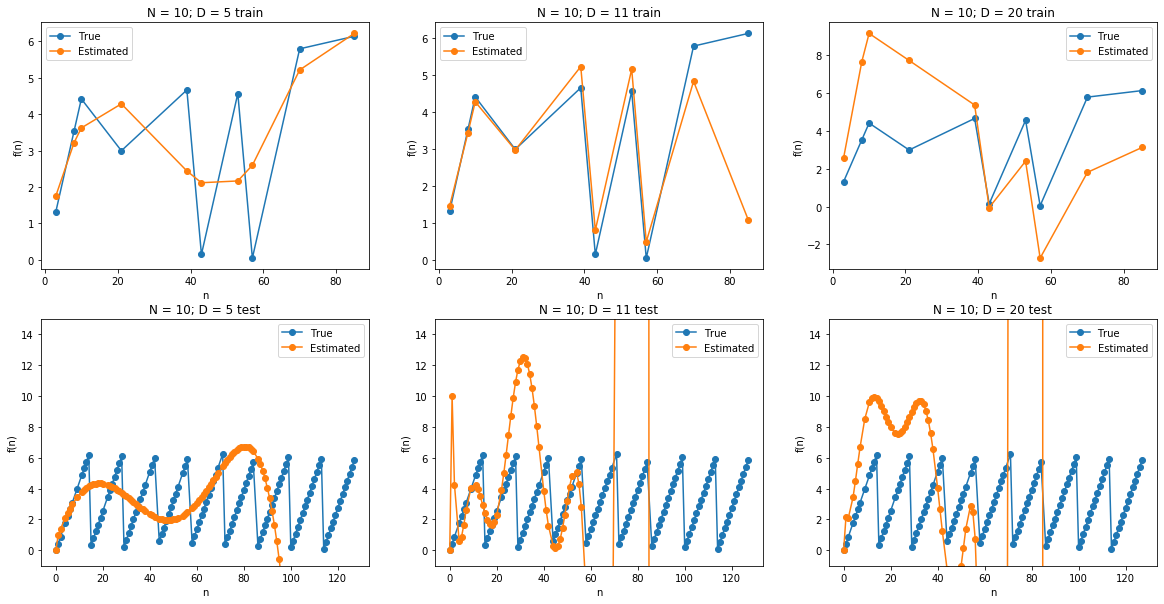

In [9]:
ls()